In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('data_science_job.csv')

In [25]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
17030,32426,city_16,0.910,Male,No relevent experience,Full time course,Masters,STEM,5.0,NaN,Pvt Ltd,21.0,0.0
2729,1469,city_159,0.843,NaN,No relevent experience,Full time course,Graduate,STEM,4.0,NaN,NaN,28.0,0.0
7827,17705,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,192.0,0.0
7588,12014,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,8.0,10/49,Public Sector,21.0,0.0
13989,13744,city_136,0.897,Male,Has relevent experience,NaN,Graduate,STEM,6.0,100-500,NGO,334.0,0.0


In [26]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [27]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [28]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
11009,0.939,no_enrollment,High School,18.0,196.0
5075,0.856,no_enrollment,Graduate,14.0,124.0
13366,0.920,no_enrollment,Graduate,5.0,53.0
12340,0.920,no_enrollment,High School,9.0,3.0
4155,0.698,no_enrollment,Masters,20.0,124.0


In [29]:
len(df[cols].dropna()) / len(df)  # 89% data remaining after doing cca for all

0.8968577095730244

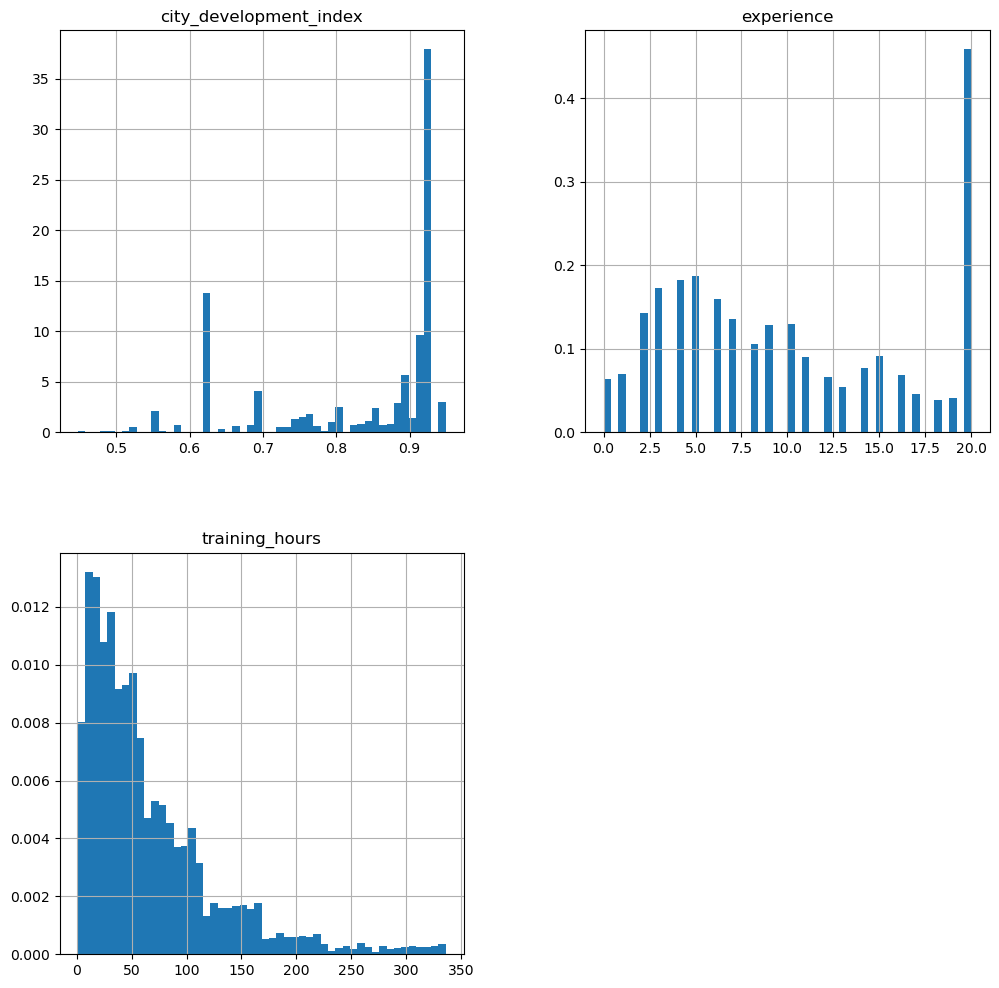

In [30]:
new_df = df[cols].dropna()
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

# Comparing before and after droping kde plots for numerical cols to verify if they are MCAR

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


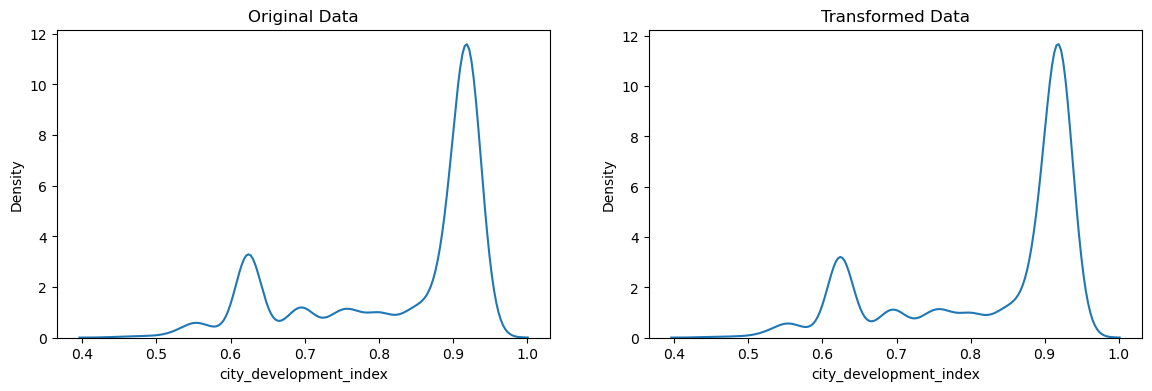

In [31]:
plt.figure(figsize=(14, 4))

# First subplot
plt.subplot(1, 2, 1)
sns.kdeplot(df['city_development_index'])
plt.title("Original Data")

# Second subplot
plt.subplot(1, 2, 2)
sns.kdeplot(new_df['city_development_index'])
plt.title("Transformed Data")

plt.show()


<Axes: >

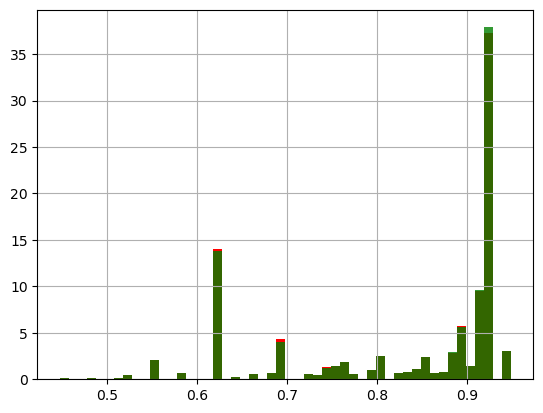

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

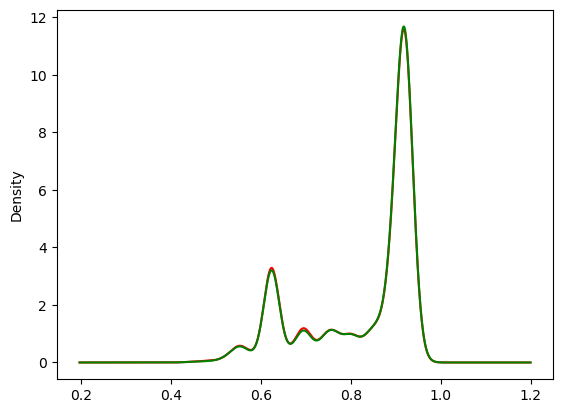

In [40]:
# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

## For training hours 

<Axes: >

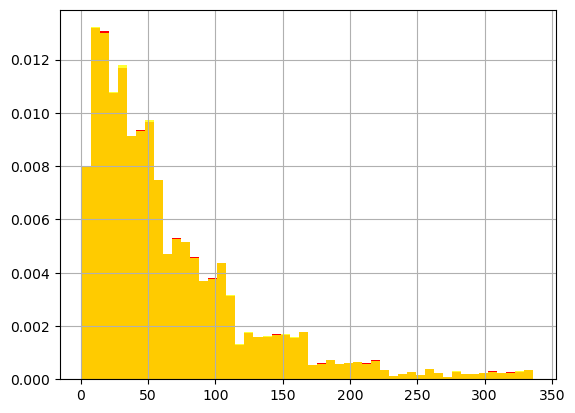

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='yellow',alpha=0.8)


## for experience 

<Axes: >

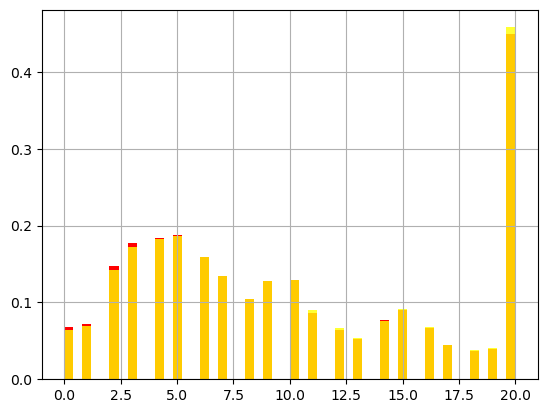

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, density=True, color='yellow',alpha=0.8)


# For categorical features we check if the ratio of categories is nearly same for before and after 

In [46]:
df['enrolled_university'].value_counts() / len(df)

enrolled_university
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: count, dtype: float64

In [47]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [50]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
